In [81]:
# Importando o pandas
import pandas as pd
# - Base: 08. Analisando o engajamento no Instagram.xlsx
bd_engajamento = pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')
# Visualizando as 5 primeiras linhas
bd_engajamento.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [19]:
# Apagando a coluna "Visualizações"
bd_engajamento = bd_engajamento.drop('Visualizações', axis=1)

In [20]:
# Visualizando novamente as 5 primeiras linhas
bd_engajamento.head(5)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [77]:
# Contando os valores que aparecem na coluna Carrossel
bd_engajamento.Carrossel.value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

In [40]:
# Agora vamos atribuir o valor N para essa coluna
# Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"
bd_engajamento.loc[bd_engajamento.Carrossel.isnull(), 'Carrossel'] = "N"
# Descrição estatística da base
bd_engajamento.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


### Visualizando essas informações de maneira gráfica

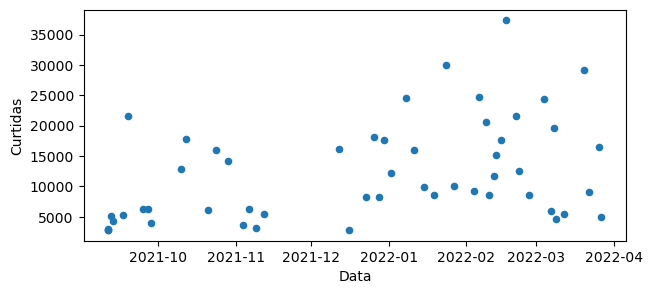

In [73]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
bd_engajamento.plot(kind="scatter",x="Data",y="Curtidas",figsize=(7,3));

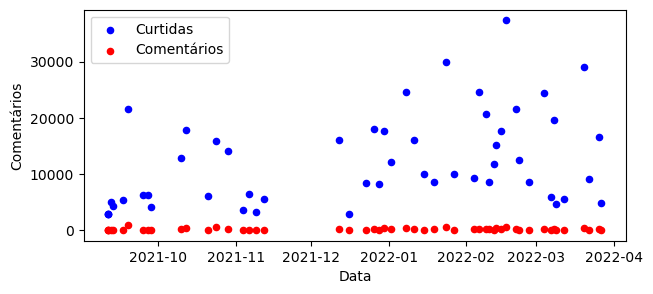

In [74]:
# curtidas e comentários no mesmo gráfico
ax = bd_engajamento.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(7,3));
bd_engajamento.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(7,3),ax=ax);

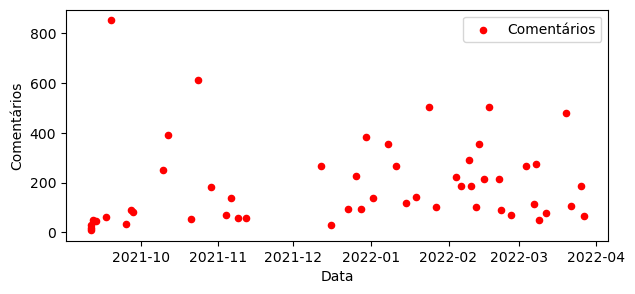

In [75]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
bd_engajamento.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(7,3));

In [47]:
# Ordenando os valores
bd_engajamento.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [ ]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [51]:
# Agrupando as informações por tipo
bd_engajamento.groupby('Tipo')['Comentários'].count()

Tipo
Foto     36
IGTV      5
Reels     5
Vídeo     6
Name: Comentários, dtype: int64

In [54]:
# Agrupando por Tipo e Pessoas
bd_engajamento.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N           3863.500000
       S          15236.666667
IGTV   S           6833.400000
Reels  N           5934.500000
       S          20832.000000
Vídeo  N           4007.500000
       S          16409.500000
Name: Curtidas, dtype: float64

In [53]:
bd_engajamento.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                           
Foto  N         3863.500000        29.50
      S        15236.666667       226.20
IGTV  S         6833.400000       133.60
Reels N         5934.500000        98.00
      S        20832.000000       342.00
Vídeo N         4007.500000        65.25
      S        16409.500000       370.00

In [55]:
# Incluindo a coluna de campanhas
bd_engajamento.groupby(['Tipo','Pessoas','Campanhas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                           
Foto  N       N           2869.000000    20.500000
              S           5852.500000    47.500000
      S       N          10815.285714   159.928571
              S          19105.375000   284.187500
IGTV  S       N           6833.400000   133.600000
Reels N       N           5934.500000    98.000000
      S       N          12894.000000   249.000000
              S          24801.000000   388.500000
Vídeo N       N           4007.500000    65.250000
      S       S          16409.500000   370.000000

In [56]:
# Somente para pessoas
bd_engajamento.groupby('Pessoas')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,4256.666667,52.833333
S,14664.550000,230.500000


In [57]:
# Somente para campanhas
bd_engajamento.groupby('Campanhas')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,7928.333333,123.166667
S,18173.272727,279.954545


In [58]:
# Carrossel (sem filtrar a base)
bd_engajamento.groupby('Carrossel')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,12343.613636,198.431818
S,11817.875000,140.375000


In [60]:
# Podemos também filtrar a base
bd_engajamento[bd_engajamento.Tipo == 'Foto'].groupby(['Carrossel'])[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,13776.357143,208.571429
S,11817.875000,140.375000


In [62]:
# Agregando por pessoas e campanhas
bd_engajamento.groupby(['Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N           3937.50         53.9
        S           5852.50         47.5
S       N           9923.75        157.8
        S          19405.35        303.2

In [63]:
# Agregando por pessoas, campanhas e tipo
bd_engajamento.groupby(['Pessoas', 'Campanhas', 'Tipo'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                            
N       N         Foto    2869.000000    20.500000
                  Reels   5934.500000    98.000000
                  Vídeo   4007.500000    65.250000
        S         Foto    5852.500000    47.500000
S       N         Foto   10815.285714   159.928571
                  IGTV    6833.400000   133.600000
                  Reels  12894.000000   249.000000
        S         Foto   19105.375000   284.187500
                  Reels  24801.000000   388.500000
                  Vídeo  16409.500000   370.000000

In [64]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
bd_engajamento[bd_engajamento.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576
